## Question 1: Gaussian Quadrature
The error function is defined as. 
\begin{equation}
    \mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2}\mathrm{d}t
\end{equation}
## Part a: Calculate $\mathrm{erf}(3)$ using Trapezoid, Simpson's, and Gaussian quadrature
Last lab we numerically approximated the integral for $x=3$ in this expression using Simpson's rule and Trapezoid rule to estimate $\mathrm{erf}(3)$. Now, we will repeat this for several numbers of steps/slices between $N=8$ and $N=1000$, while also employing Gaussian quadrature method to calculate this integral. 

In [2]:
#PART A
# Andrew Hardy
#i) 
#import packages
import numpy as np
from scipy.special import erf
from gaussxw import gaussxw
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# defining variables taken from Q2.A from Lab 2, done by Brayden.
#define a function for Trapezoid rule 
def Trapezoid(function, i_N, f_a, f_b):
    """
    A function for performing numerical integration of the mathematical function 
    the trapezoid rule for N steps between a and b.
    INPUT:
    function [function handle of single variable] is the function whose integral is to be numerically approximated 
    N [int] number of steps
    a [float] lower bound of integration
    b [float] upper bound of integration
    """
    f_h = (f_b-f_a)/i_N #width of slices
    f_s = 0.5*function(f_a) + 0.5*function(f_b) #the constant terms in the series expansion defining the trapezoid rule as in equation 5.3 of Newman

    for j in range(1,i_N):
        f_s += function(f_a+j*f_h)
        
    f_integral = f_h*f_s
    return f_integral

#define a function for Simpson's rule
def Simpson(function, i_N, f_a, f_b):
    """
    A function for performing numerical integration of the mathematical function according to
    Simpson's rule for N steps between a and b.
    INPUT:
    function [function handle of single variable] is the function whose integral is to be numerically approximated 
    N [int] number of steps
    a [float] lower bound of integration
    b [float] upper bound of integration
    """
    f_h = (f_b-f_a)/i_N #width of slices
    f_s = function(f_a) + function(f_b) #the constant terms in the series expansion defining the trapezoid rule as in equation 5.3 of Newman
    
    for k in range(1,i_N,2): #loop over odd terms
        f_s += 4*function(f_a+k*f_h)
    for k in range(2,i_N,2): #loop over even terms
        f_s += 2*function(f_a+k*f_h)
        
    f_integral = f_h*f_s/3
    return f_integral
def Gaussian(function, i_N, f_a, f_b):
    """
    A function for performing numerical integration of the mathematical function according to
    Gaussian Quadrature for N steps between a and b. Basically ripped off Newman's gaussint.py
    INPUT:
    function [function handle of single variable] is the function whose integral is to be numerically approximated 
    N [int] number of steps
    a [float] lower bound of integration
    b [float] upper bound of integration
    """
    f_x,f_w = gaussxw(i_N)
    f_xp = 0.5*(f_b-f_a)*f_x + 0.5*(f_b+f_a)
    f_wp = 0.5*(f_b-f_a)*f_w

    # Perform the integration
    f_s = 0.0
    for k in range(i_N):
        f_s += f_wp[k]*function(f_xp[k])
    return f_s


In [4]:
#define function to be integrated
def errorfunction(f_t):
    return 2/np.sqrt(np.pi)*np.exp(-f_t**2) # define the Error function

In [5]:
i_length = int((1000-8)/2+1) #define size for arrays
#pre-allocate memory for arrays
a_erf_trap = np.empty(i_length)
a_erf_simp = np.empty(i_length)
a_erf_gauss = np.empty(i_length)
a_N = np.empty(i_length)
# define several empty arrays to be filled with a sampling of points from N = 8, 1000 by even numbers

i = 8 #start a N=8 steps
j = 0 #a counter index
while i<=1000: #go up to N=1000
    a_N[j] = i
    a_erf_trap[j-8] = Trapezoid(errorfunction, i,0,3)
    a_erf_simp[j-8] = Simpson(errorfunction, i, 0,3)
    a_erf_gauss[j-8] = Gaussian(errorfunction, i, 0,3)
    i += 2 #increment steps/slices by 2 so that N is always even (Simpsons is only valid for even N)
    j += 1 #increment counter index by 1

In [6]:
print('Trapezoid rule evaluation of erf(3) for 8<N<1000:')
#print(a_erf_trap)
print('Simpson rule evaluation of erf(3) for 8<N<1000:')
#print(a_erf_simp)
print('Gaussian quadrature evaluation of erf(3) for 8<N<1000:')
#print(a_erf_gauss)

Trapezoid rule evaluation of erf(3) for 8<N<1000:
Simpson rule evaluation of erf(3) for 8<N<1000:
Gaussian quadrature evaluation of erf(3) for 8<N<1000:


In [7]:
mn_trap = np.mean(a_erf_trap)
mn_simp = np.mean(a_erf_simp)
mn_gauss = np.mean(a_erf_gauss)
sd_trap = np.std(a_erf_trap)
sd_simp = np.std(a_erf_simp)
sd_gauss = np.std(a_erf_gauss)
print('Mean value for erf(3) with Trapezoid rule was {0} with standard deviation of {1}'.format(mn_trap, sd_trap))
print('Mean value for erf(3) with Simpson rule was {0} with standard deviation of {1}'.format(mn_simp, sd_simp))
print('Mean value for erf(3) with Gaussian quadrature was {0} with standard deviation of {1}'.format(mn_gauss, sd_gauss))

Mean value for erf(3) with Trapezoid rule was 0.9999778231853969 with standard deviation of 5.715079892948464e-07
Mean value for erf(3) with Simpson rule was 0.9999779012620776 with standard deviation of 9.939718061538508e-08
Mean value for erf(3) with Gaussian quadrature was 0.9999779095625705 with standard deviation of 1.3022291594138554e-09


## Part b: Estimation of error
Below we calculate the relative error for Trapezoid rule, Simpson's rule, and Gaussian quadrature holding scipy's value for $\mathrm{erf}(3)$ to the the ''true'' value. This is done acording to the simple equation of $\epsilon_{\mathrm{relative}} = \frac{\mathrm{estimated \ value} - \mathrm{true \ value}}{\mathrm{true \ value}}$. Additionally we will use equation (2) from the lab manual (which is equation 5.66 in Newman) as a method of ''practical error estiamtion'' for Gaussian quadrature. For $N$ steps the error estimate $\epsilon_N$ is given by:
\begin{equation}
    \epsilon_N = I_{2N} - I_N
\end{equation}
The results of relative error are plotted on a log-log scale against steps/slices $N$ and the result of equation (2) over the range of different $N$ is compared to the relative error for each $N$ and turn out to be in good agreement.

In [8]:
#1b)
#relative error of  compared to the Scipy true value
f_true = erf(3)
a_rel_simp = (a_erf_simp - f_true)/f_true
a_rel_trap = (a_erf_trap - f_true)/f_true
a_rel_gauss = (a_erf_gauss - f_true)/f_true

In [9]:
#1b)
#Brayden Kell
#get practical error of Gauss according to eq. (2) in lab manual
a_N2 = 2*a_N    # double the size of N 
# Defining empty arrays for memory pre-allocation 
a_erf_gauss_2 = np.empty(len(a_N2))
for i in range(len(a_N2)):
    #gauss
    i_n = int(a_N2[i])
    a_erf_gauss_2[i] = Gaussian(errorfunction, i_n, 0,3)
#implementation of equation (2) after calcuating I1, I2 above
a_err_gauss = a_erf_gauss_2 - a_erf_gauss


"\nplt.figure()\nplt.yscale('log')\nplt.xscale('log')\nplt.scatter(a_N, abs(a_rel_gauss),s = 4, label = 'Gaussian')\nplt.xlabel('Steps/Slices')\nplt.ylabel('Error')\nplt.title('Error vs. Steps/Slices')\nplt.legend()\n"

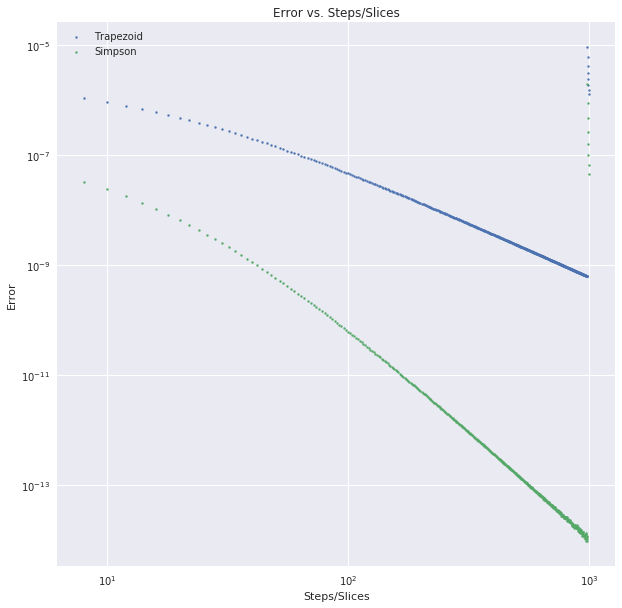

In [10]:
# plotting relative error for each of the three methods
plt.figure(figsize = (10,10))
plt.yscale('log')
plt.xscale('log')
plt.scatter(a_N, abs(a_rel_trap), s = 4, label = 'Trapezoid')
plt.xlabel('Steps/Slices')
plt.ylabel('Error')
plt.title('Error vs. Steps/Slices')

plt.scatter(a_N, abs(a_rel_simp), s = 4,label = 'Simpson')
plt.legend()
#below is the code to produce the plot of relative error for Gaussian quadrature method against steps
#but is commented out due to the small size of the error rendering values of -inf in log. 
'''
plt.figure()
plt.yscale('log')
plt.xscale('log')
plt.scatter(a_N, abs(a_rel_gauss),s = 4, label = 'Gaussian')
plt.xlabel('Steps/Slices')
plt.ylabel('Error')
plt.title('Error vs. Steps/Slices')
plt.legend()
'''

In [11]:
md_rel_gauss = np.median(abs(a_rel_gauss))
md_err_gauss = np.median(abs(a_err_gauss))
print('The relative error for Gauss has median of {0:.3E}.'.format(md_rel_gauss))
print('The error according to equation (2) for Gauss has median of {0:.3E}.'.format(md_err_gauss))


The relative error for Gauss has median of 4.441E-16.
The error according to equation (2) for Gauss has median of 7.772E-16.


Notice above that there is no plot included for the relative error of Gauss against number of steps since the order of magnitude for most of the values are so small ($O(10^{-16}$) that taking the log of it produces -inf values in python. Additionally, observe that both the relative error for Simpson and Trapezoid approach linearity, with a negative slope, as $N$ gets larger. The relative error for Simpson's rule is several orders of magnitude smaller than that of Trapezoid rule for every $N$ between $8$ and $1000$. Also, one can see that equation (2) is good agreement to relative error for Gaussian quadrature error estimation in this case, both having median values with $O(10^{-16})$ size. This is essentially round-off error (i.e. as close as you can possibly numerically compute an integral in python).

### Part c: Blowing snow
An empirical equation for blowing snow in the Canadian Praries is given by the following:
\begin{equation}
    P(u_{10}, T_a, t_h) = \frac{1}{\sqrt{2\pi}\delta} \int_0^{u_{10}} \mathrm{exp}\bigg [- \frac{(\bar{u}-u)^2}{2\delta^2}\bigg ]\mathrm{d}u
\end{equation}
with mean wind speed $\bar{u} = 11.2 + 0.365T_a + 0.00706 T_a^2 + 0.9 \mathrm{ln}(t_h)$, and standard deviation of wind speed $\delta = 4.3 + 0.145 T_a + 0.00196 T_a^2$ for temperature in $^{\circ}C$, $T_a$, and surface snow age in hours, $t_h$.
Since 
\begin{equation}
 \int_{-x}^{x} G(x) dx = \mathrm{erf}(\frac{x}{\delta\sqrt{2}})
\end{equation}
and a gaussian function is symmetric about its peak, I can rephrase this as 
\begin{equation}
 \int_{0}^{x} G(x) dx = \frac{1}{2}\mathrm{erf}(\frac{x}{\delta\sqrt{2}})
\end{equation}
which means I can write $P$ as 
\begin{equation}
P(u_{10}, T_a, t_h) = \int_{0}^{u_{10}}\frac{1}{2\sqrt{2\pi}\delta} \mathrm{erf}(\frac{\bar{u} - u}{\delta\sqrt{2}})
\end{equation}
Below we use Gaussian quadrature with $N=100$ to numerically evaluate the integral in the above equation and plot it as a function of $T_a$ for $u_{10} =(6,8,10)ms^{-1}$, $t_h = (24, 48, 72)$ hours.

In [20]:
a_u10 = np.array([6, 8, 10]) #some values for u_10
a_th = np.array([24, 48, 72]) #some values for t_h in seconds
a_ta = np.arange(-60, 30, 1) #some values for t_a
def Umean(a_ta, i_th): #definition of u bar in the expression for probability of blowing snow 
    return 11.2 + 0.365 * a_ta + 0.00706 * a_ta ** 2 + 0.9 * np.log(i_th)
def Delta(a_ta): #definition of delta in the expression for probability of blowing snow
    return 4.3 + 0.145 * a_ta + 0.00196 * a_ta** 2
def Perfversion(u): # probability of blowing snow (equation (3) from manual) re-cast to be in terms of erf
    denom = 2*np.sqrt(2 * np.pi) * Delta(a_ta) 
    numer = errorfunction((Umean(a_ta, i_th) - u) / (np.sqrt(2) * Delta(a_ta)))
    return numer / denom
def P(i_u10, a_ta, i_th): #use Gaussian quadrature to calculate the integral 
    a = 0  # beginning value
    N = 100  # number of steps
    return Gaussian(Perfversion, N, a, i_u10)

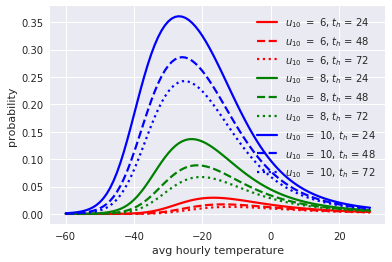

In [21]:
# Choosing color for characterizing u_10
colours = ('r', 'g', 'b')

# Choosing line type to characterize t_h
lines = ('-','--',  ':')


plt.figure()
plt.clf()
for (i_u10, colour) in zip(a_u10, colours):
	# For each u_10, we have different color
	
	for (i_th, line) in zip(a_th, lines):
	# For each different t_h, we get a different line
	
		plot_str = colour + line
		plt.plot(a_ta, P(i_u10, a_ta, i_th), plot_str, linewidth = 2.2, \
	    label = '{0} $=$ {1}, $t_h$ = {2}'.format('$u_{10}$', i_u10, i_th))

plt.xlabel('avg hourly temperature')
plt.ylabel('probability')
plt.legend(loc = 'best')

#### Dependency of blown snow based on several variables
The most immediately visible dependence is that the snow probability has a vaguely gaussian probability distribuition, which peaks around -25 or so Celcius.   
The next largest dependence is that as the strength of wind increases, the probability drastically increases, that is rather obvious. 
There's a third dependence, where younger snow, shown by the solid line, has a higher probability of blowing. This is also intuitive, because young snow feels fluffier and is less compact 